In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [3]:
#data synthetic
def synthetic_data(w,b,num_examples):#mat,mat,number of examples
    x=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(x,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return x,y.reshape((-1,1))

true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)


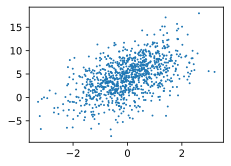

In [9]:
d2l.set_figsize()
d2l.plt.scatter(features[:,0].detach().numpy(),labels.detach().numpy(),1)

In [10]:
#读取数据值
def data_iter(batch_size,feature,labels):
    num_examples=len(feature)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]